In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
def call_payoff(S, K):
    payoff = np.maximum(S - K, 0)
    return payoff

def put_payoff(S, K):
    payoff = np.maximum(K - S, 0)
    return payoff

def digital_call_payoff(S, K):
    payoff = 1*(S>K)
    return payoff

def digital_put_payoff(S, K):
    payoff = 1*(S<K)
    return payoff

def risk_free_payoff(S, P):
    payoff = [P] * len(S)
    return payoff

In [48]:
ST = np.arange(0,10)
ST

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
call_payoff(ST, K=5)

array([0, 0, 0, 0, 0, 0, 1, 2, 3, 4])

In [57]:
plt.style.use('classic')

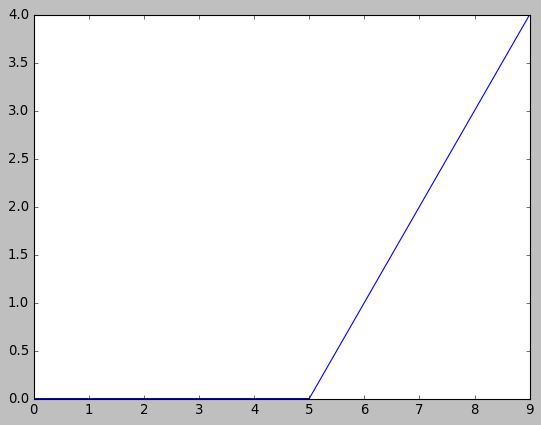

In [58]:
X = ST
Y = call_payoff(ST, K=5)
plt.plot(X, Y)

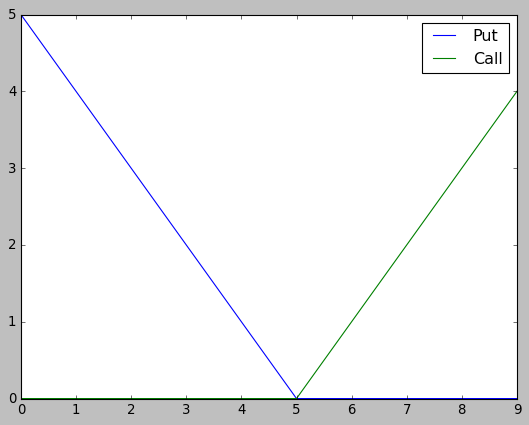

In [59]:
Put = put_payoff(ST, 5)
plt.plot(X,Put, label='Put')
plt.plot(X, Y, label = 'Call')
plt.legend()

### Black Scholes Merton Model

In [60]:
def BS_call(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    Call = S * stats.norm.cdf(d1,0.0,1.0) - K * np.exp(-r*t) * stats.norm.cdf(d2,0.0,1.0)
    return Call
def BS_put(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    Put = K * np.exp(-r*t) * stats.norm.cdf(-d2,0.0,1.0) - S * stats.norm.cdf(-d1,0.0,1.0)
    return Put

### Option Trading Strategies

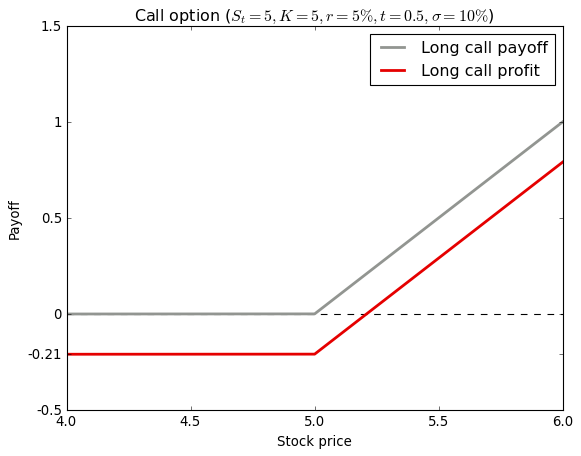

In [61]:
plt.style.use('classic')
S_t = 5
K = 5
r = 0.05
t = 0.5
Sigma = 0.1
Call_price = BS_call(S_t, K, r, t, Sigma)
S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Call option ($S_t = 5, K = 5, r = 5\%, t = 0.5, \sigma = 10\%$)')
plt.ylabel('Payoff')
plt.xlabel('Stock price')
plt.plot(S, call_payoff(S, K), color='xkcd:gray', linewidth=2.5)
plt.plot(S, call_payoff(S, K) - Call_price, color='xkcd:red', linewidth=2.5)
plt.yticks([-0.5, -Call_price, 0, 0.5, 1, 1.5], ['-0.5',str(-round(Call_price,2)), '0', '0.5', '1', '1.5'])
plt.xlim(4,6)
plt.ylim(-0.5,1.5)
plt.legend(['Long call payoff', 'Long call profit'], loc='best')
#plt.savefig('call_payoff.png', bbox_inches="tight", dpi=600)
plt.show()

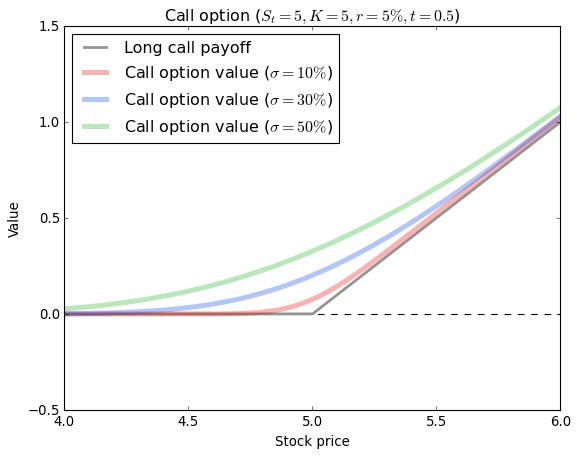

In [62]:
plt.style.use('classic')
S_t = 5
K = 5
r = 0.05
t = 0.5
Sigma = 0.1
Call_price = BS_call(S_t, K, r, t, Sigma)
S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Call option ($S_t = 5, K = 5, r = 5\%, t = 0.5$)')
plt.ylabel('Value')
plt.xlabel('Stock price')
plt.plot(S, call_payoff(S, K), color='xkcd:gray', linewidth=2.5)
plt.plot(S, BS_call(S, K, r, 0.1, Sigma), color='xkcd:red', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_call(S, K, r, 0.1, 0.3), color='xkcd:blue', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_call(S, K, r, 0.1, 0.5), color='xkcd:green', linewidth=4.5,alpha=0.3)
plt.xlim(4,6)
plt.ylim(-0.5,1.5)
plt.legend(['Long call payoff', 'Call option value ($\sigma=10\%$)', 'Call option value ($\sigma=30\%$)',
'Call option value ($\sigma=50\%$)'], loc='best')
#plt.savefig('call_vola.png', bbox_inches="tight", dpi=600)
plt.show()

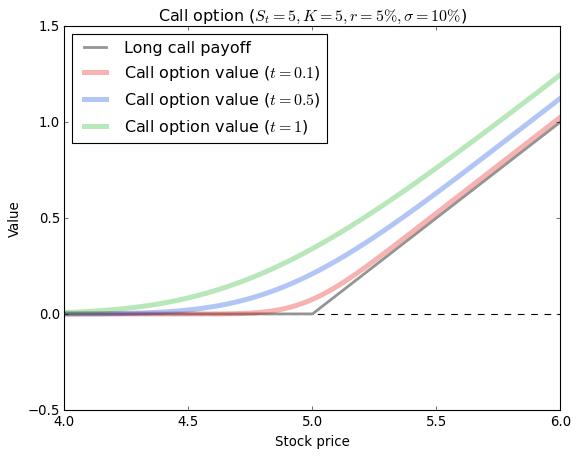

In [10]:
plt.style.use('classic')
S_t = 5
K = 5
r = 0.05
t = 0.5
Sigma = 0.1
Call_price = BS_call(S_t, K, r, t, Sigma)
S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Call option ($S_t = 5, K = 5, r = 5\%, \sigma = 10\%$)')
plt.ylabel('Value')
plt.xlabel('Stock price')
plt.plot(S, call_payoff(S, K), color='xkcd:gray', linewidth=2.5)
plt.plot(S, BS_call(S, K, r, 0.1, Sigma), color='xkcd:red', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_call(S, K, r, 0.5, Sigma), color='xkcd:blue', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_call(S, K, r, 1, Sigma), color='xkcd:green', linewidth=4.5,alpha=0.3)
plt.xlim(4,6)
plt.ylim(-0.5,1.5)
plt.legend(['Long call payoff', 'Call option value ($t=0.1$)', 'Call option value ($t=0.5$)',
'Call option value ($t=1$)'], loc='best')
#plt.savefig('call_ttm.png', bbox_inches="tight", dpi=600)
plt.show()

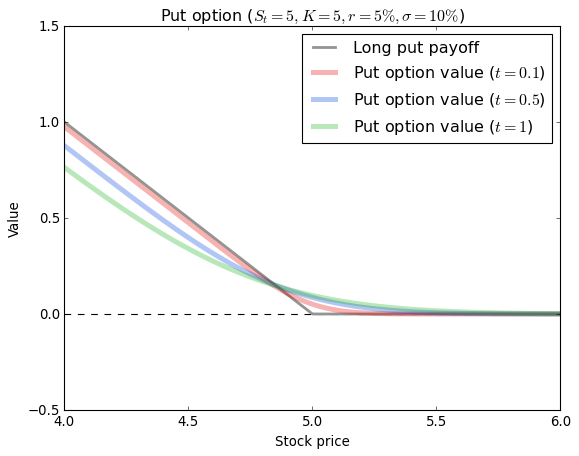

In [11]:
plt.style.use('classic')
S_t = 5
K = 5
r = 0.05
t = 0.5
Sigma = 0.1
S = np.linspace(0.0001, S_t*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Put option ($S_t = 5, K = 5, r = 5\%, \sigma = 10\%$)')
plt.ylabel('Value')
plt.xlabel('Stock price')
plt.plot(S, put_payoff(S, K), color='xkcd:gray', linewidth=2.5)
plt.plot(S, BS_put(S, K, r, 0.1, Sigma), color='xkcd:red', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_put(S, K, r, 0.5, Sigma), color='xkcd:blue', linewidth=4.5,alpha=0.3)
plt.plot(S, BS_put(S, K, r, 1, Sigma), color='xkcd:green', linewidth=4.5,alpha=0.3)
plt.xlim(4,6)
plt.ylim(-0.5,1.5)
plt.legend(['Long put payoff', 'Put option value ($t=0.1$)', 'Put option value ($t=0.5$)',
'Put option value ($t=1$)'], loc='best')
#plt.savefig('put_ttm.png', bbox_inches="tight", dpi=600)
plt.show()

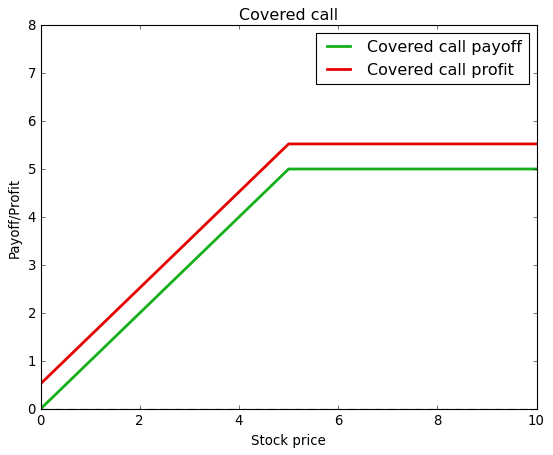

In [12]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Covered call')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = S - call_payoff(S, 5)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.2
Cost = -BS_call(S_t, 5, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(0,8)
plt.legend(['Covered call payoff', 'Covered call profit'], loc='best')
#plt.savefig('Covered_call.png', bbox_inches="tight", dpi=600)
plt.show()

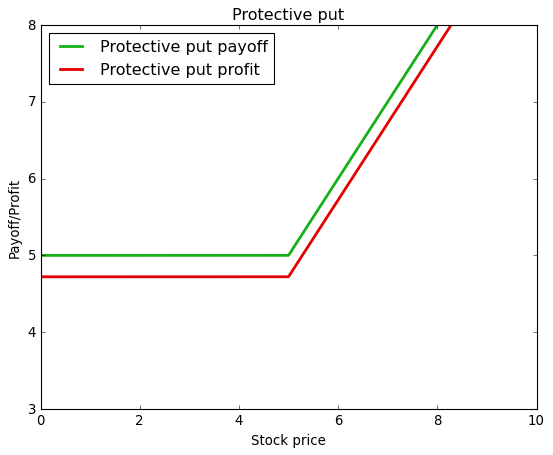

In [13]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Protective put')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = S + put_payoff(S, 5)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.2
Cost = BS_put(S_t, 5, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(3,8)
plt.legend(['Protective put payoff', 'Protective put profit'], loc='best')
#plt.savefig('Protective_put.png', bbox_inches="tight", dpi=600)
plt.show()

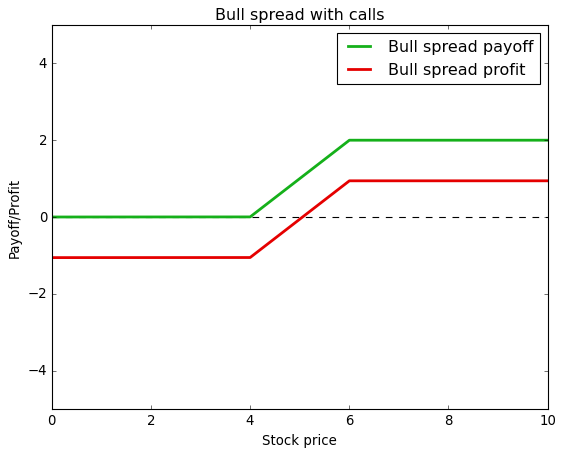

In [14]:
 plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Bull spread with calls')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 4) - call_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_call(S_t, 4, r, t, Sigma) - BS_call(S_t, 6, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Bull spread payoff', 'Bull spread profit'], loc='best')
#plt.savefig('Bull_spread_call.png', bbox_inches="tight", dpi=600)
plt.show()

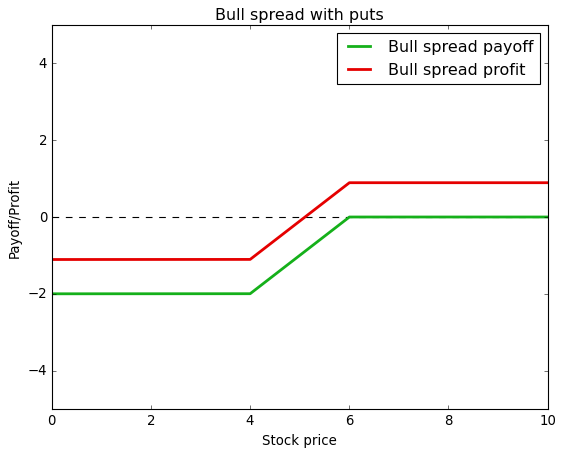

In [16]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Bull spread with puts')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = put_payoff(S, 4) - put_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_put(S_t, 4, r, t, Sigma) - BS_put(S_t, 6, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Bull spread payoff', 'Bull spread profit'], loc='best')
#plt.savefig('Bull_spread_put.png', bbox_inches="tight", dpi=600)
plt.show()

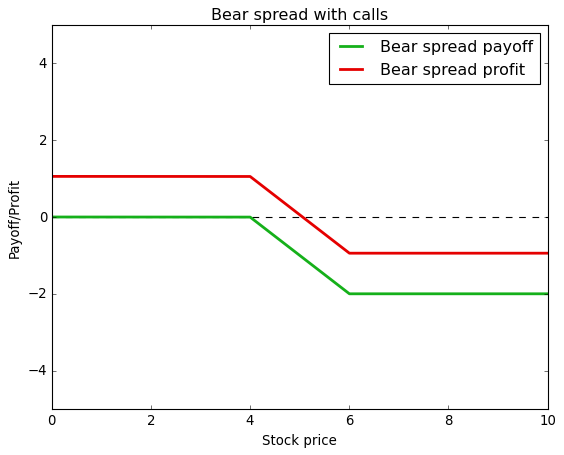

In [17]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Bear spread with calls')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 6) - call_payoff(S, 4)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_call(S_t, 6, r, t, Sigma) - BS_call(S_t, 4, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Bear spread payoff', 'Bear spread profit'], loc='best')
#plt.savefig

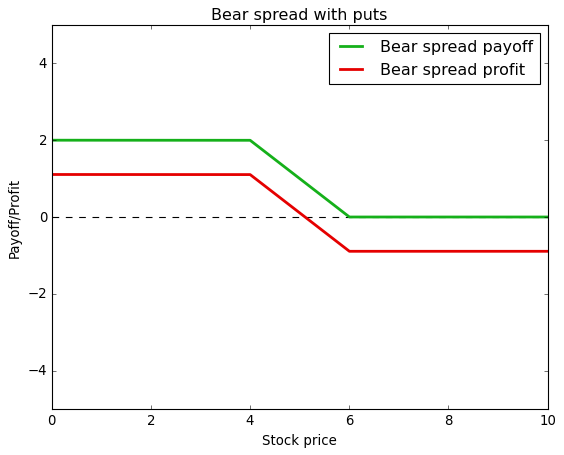

In [18]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Bear spread with puts')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = put_payoff(S, 6) - put_payoff(S, 4)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_put(S_t, 6, r, t, Sigma) - BS_put(S_t, 4, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Bear spread payoff', 'Bear spread profit'], loc='best')
#plt.savefig('Bear_spread_put.png', bbox_inches="tight", dpi=600)
plt.show()

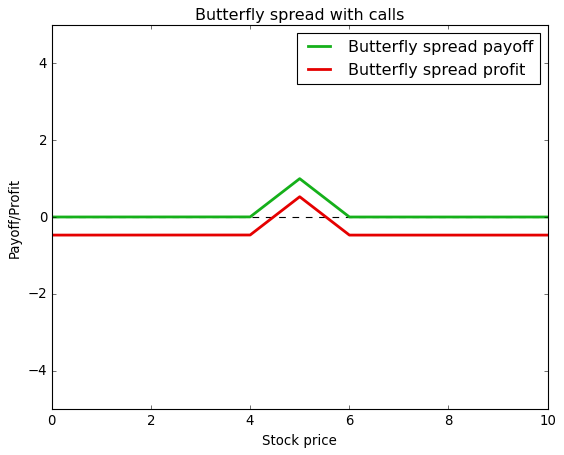

In [20]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Butterfly spread with calls')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 4) - 2*call_payoff(S, 5) + call_payoff(S,6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_call(S_t, 4, r, t, Sigma) - 2*BS_call(S_t, 5, r, t, Sigma) + BS_call(S_t, 6, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Butterfly spread payoff', 'Butterfly spread profit'], loc='best')
#plt.savefig
plt.show()

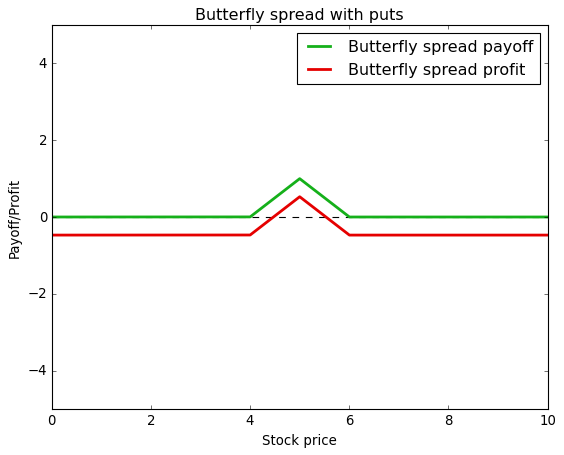

In [22]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Butterfly spread with puts')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = put_payoff(S, 4) - 2*put_payoff(S, 5) + put_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_put(S_t, 4, r, t, Sigma) - 2*BS_put(S_t, 5, r, t, Sigma) + BS_put(S_t,6, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Butterfly spread payoff', 'Butterfly spread profit'], loc='best')
#plt.savefig('Butterfly_spread_put.png', bbox_inches="tight", dpi=600)
plt.show()

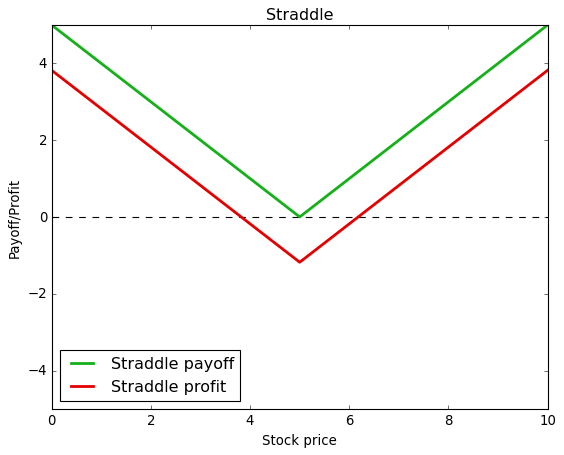

In [23]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Straddle')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 5) + put_payoff(S, 5)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 5, r, t, Sigma) + BS_put(S_t, 5, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Straddle payoff', 'Straddle profit'], loc='best')
#plt.savefig('Straddle.png', bbox_inches="tight", dpi=600)
plt.show()

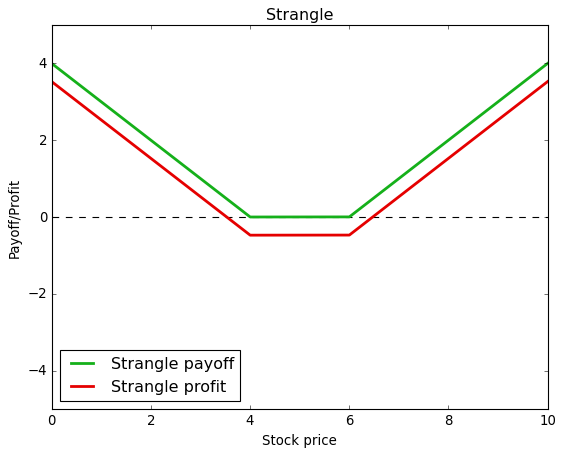

In [24]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Strangle')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 6) + put_payoff(S, 4)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 6, r, t, Sigma) + BS_put(S_t, 4, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Strangle payoff', 'Strangle profit'], loc='best')
#plt.savefig('Strangle.png', bbox_inches="tight", dpi=600)
plt.show()

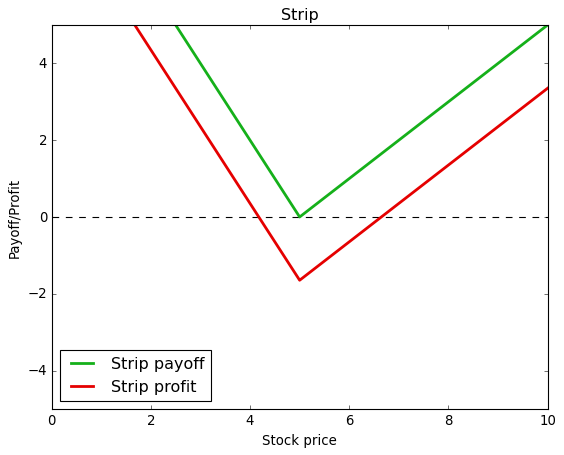

In [25]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Strip')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 5) + 2*put_payoff(S, 5)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 5, r, t, Sigma) + 2*BS_put(S_t, 5, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Strip payoff', 'Strip profit'], loc='best')
#plt.savefig('Strip.png', bbox_inches="tight", dpi=600)
plt.show()

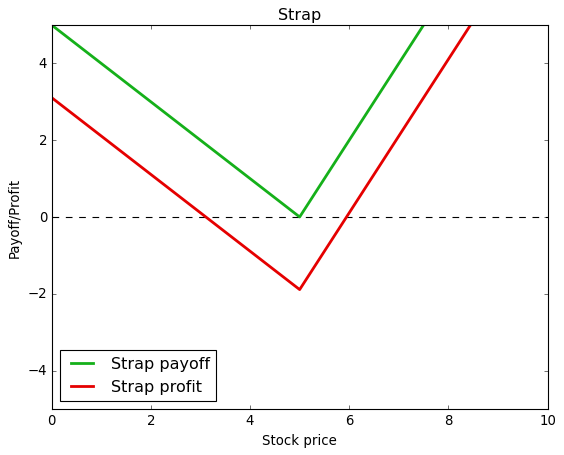

In [26]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Strap')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = 2*call_payoff(S, 5) + put_payoff(S, 5)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = 2*BS_call(S_t, 5, r, t, Sigma) + BS_put(S_t, 5, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Strap payoff', 'Strap profit'], loc='best')
#plt.savefig('Strip.png', bbox_inches="tight", dpi=600)
plt.show()

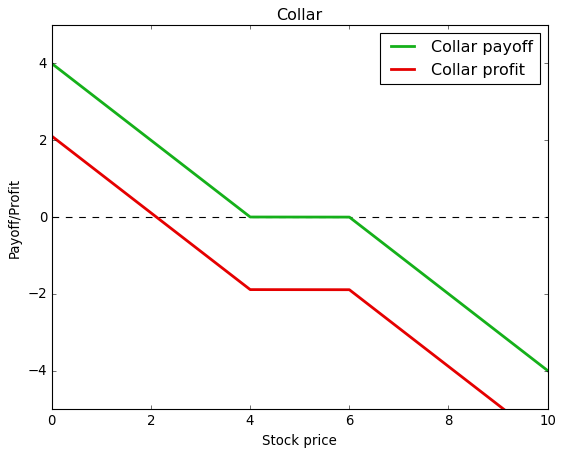

In [27]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Collar')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = -call_payoff(S, 6) + put_payoff(S, 4)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = 2*BS_call(S_t, 5, r, t, Sigma) + BS_put(S_t, 5, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Collar payoff', 'Collar profit'], loc='best')
#plt.savefig('Collar.png', bbox_inches="tight", dpi=600)
plt.show()

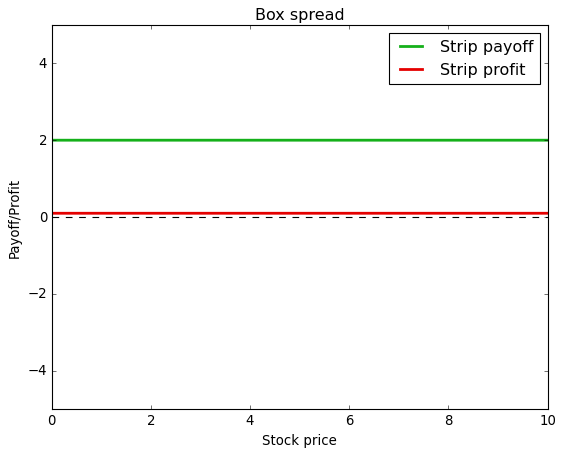

In [29]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Box spread')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 4) - put_payoff(S, 4) + put_payoff(S,6) - call_payoff(S,6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 4, r, t, Sigma) - BS_put(S_t, 4, r, t, Sigma) + BS_put(S_t,6, r, t, Sigma) - BS_call(S_t, 6, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Strip payoff', 'Strip profit'], loc='best')
#plt.savefig('Strip.png', bbox_inches="tight", dpi=600)
plt.show()

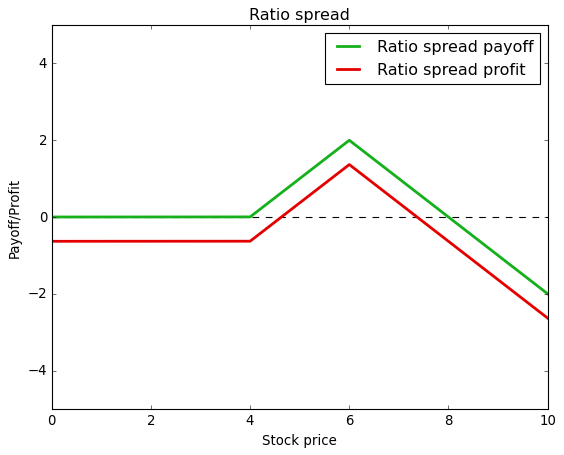

In [30]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Ratio spread')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 4) - 2*call_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 1
Sigma = 0.3
Cost = BS_call(S_t, 4, r, t, Sigma) - 2*BS_call(S_t, 6, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Ratio spread payoff', 'Ratio spread profit'], loc='best')
#plt.savefig('Ratio_spread.png', bbox_inches="tight", dpi=600)
plt.show()

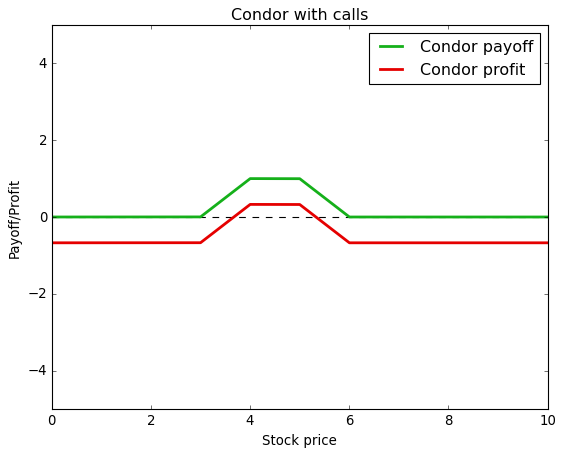

In [32]:
plt.style.use('classic')
S = 5
S = np.linspace(0, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Condor with calls')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
Payoff = call_payoff(S, 3) - call_payoff(S, 4) - call_payoff(S, 5) + call_payoff(S, 6)
plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
S_t = 5
r = 0.05
t = 0.5
Sigma = 0.2
Cost = BS_call(S_t, 3, r, t, Sigma) - BS_call(S_t, 4, r, t, Sigma) - BS_call(S_t, 5, r, t, Sigma) + BS_call(S_t, 6, r, t, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Condor payoff', 'Condor profit'], loc='best')
#plt.savefig('Condor_call.png', bbox_inches="tight", dpi=600)
plt.show()

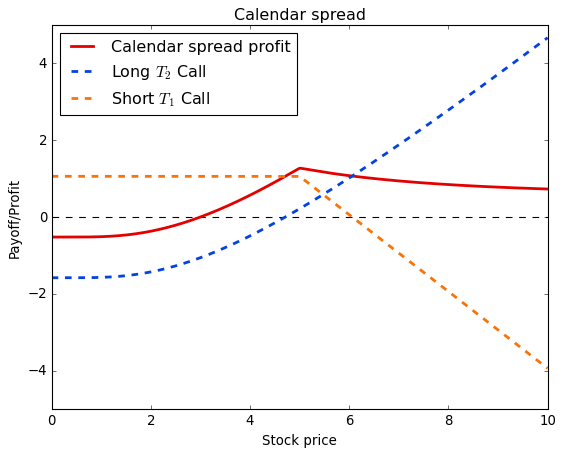

In [34]:
plt.style.use('classic')
S = 5
S = np.linspace(0.0001, S*2, 10000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Calendar spread')
plt.ylabel('Payoff/Profit')
plt.xlabel('Stock price')
S_t = 5
r = 0.05
t_1 = 0.0001
t_2 = 5
Sigma = 0.3
#Payoff = BS_call(S, 5, r, t_1, Sigma) - BS_call(S, 5, r, t_2, Sigma)
#plt.plot(S, Payoff, color='xkcd:green', linewidth=2.5)
Payoff = BS_call(S, 5, r, t_2, Sigma) - BS_call(S, 5, r, t_1, Sigma)
Cost = BS_call(S_t, 5, r, 4, Sigma) - BS_call(S_t, 5, r, 2, Sigma)
plt.plot(S, Payoff - Cost, color='xkcd:red', linewidth=2.5)
Payoff = BS_call(S, 5, r, t_2, Sigma) - BS_call(S_t, 5, r, 4, Sigma)
plt.plot(S, Payoff, '--', color='xkcd:blue', linewidth=2.5)
Payoff = -BS_call(S, 5, r, t_1, Sigma) + BS_call(S_t, 5, r, 2, Sigma)
plt.plot(S, Payoff, '--', color='xkcd:orange', linewidth=2.5)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.legend(['Calendar spread profit', 'Long $T_2$ Call', 'Short $T_1$ Call'],loc='best')
#plt.savefig('Calendar_spread.png', bbox_inches="tight", dpi=600)
plt.show()